In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import scipy.fft

In [2]:
import os

In [17]:
data_files = {
    data_dir: [
        os.path.join('../data', data_dir, f) for f in os.listdir(os.path.join('../data', data_dir)) if f.endswith('.wav')
    ]
    for data_dir in os.listdir('../data')
}

In [18]:
data = {
    data_dir: list(map(scipy.io.wavfile.read, files))
    for data_dir, files in data_files.items()
}

In [70]:
for data_dir, data_vals in data.items():
    print(data_dir, 'lengths:', *map("{:.2f}".format, (v.shape[0] / rate for rate, v in data_vals)), sep='\t')

blue	lengths:	3.50	2.47	2.60	2.35	2.05
green	lengths:	2.56	2.75	2.84	2.60	2.52
nie	lengths:	2.47	2.71	2.67	2.56	2.52
one	lengths:	2.94	3.37	3.41	3.01	3.41
red	lengths:	2.56	2.56	2.65	1.77	1.73
tak	lengths:	2.43	2.33	2.67	2.45	2.28
two	lengths:	2.52	2.56	2.62	2.56	2.60
_	lengths:	2.62	2.71	2.52	2.56	2.75


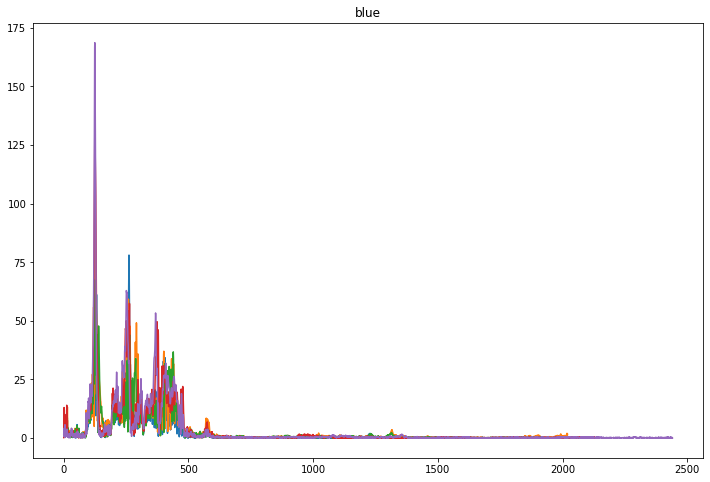

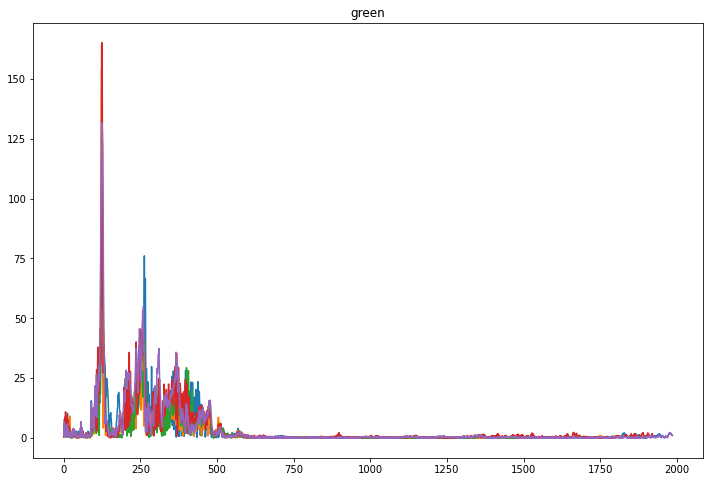

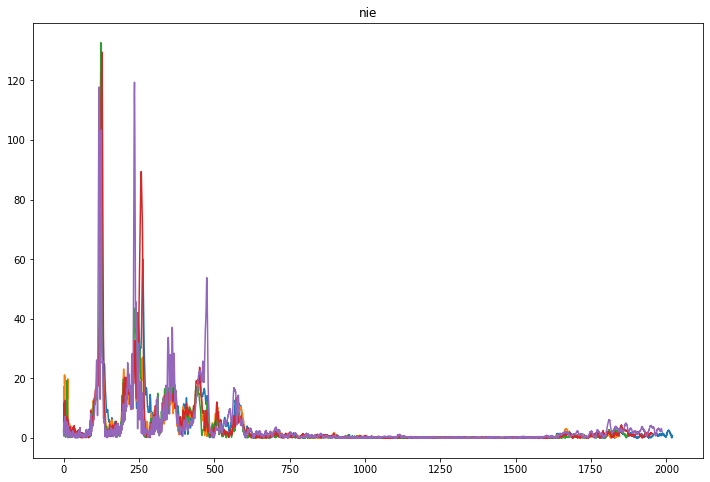

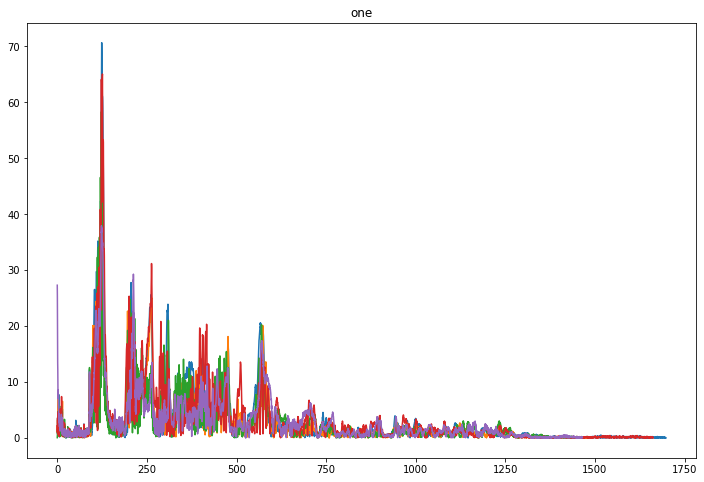

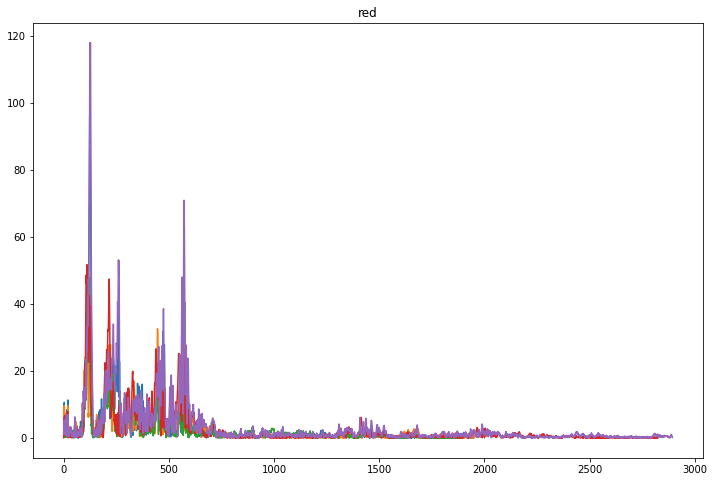

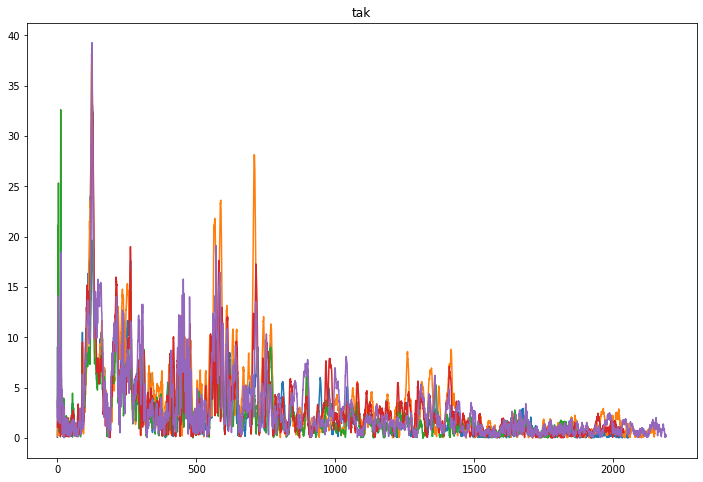

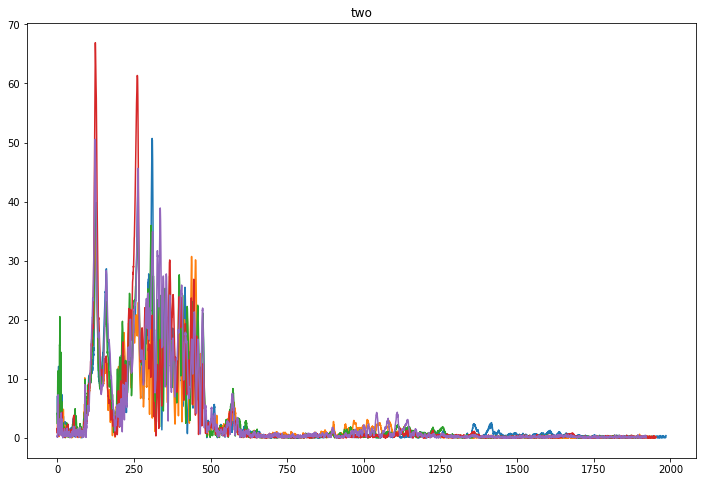

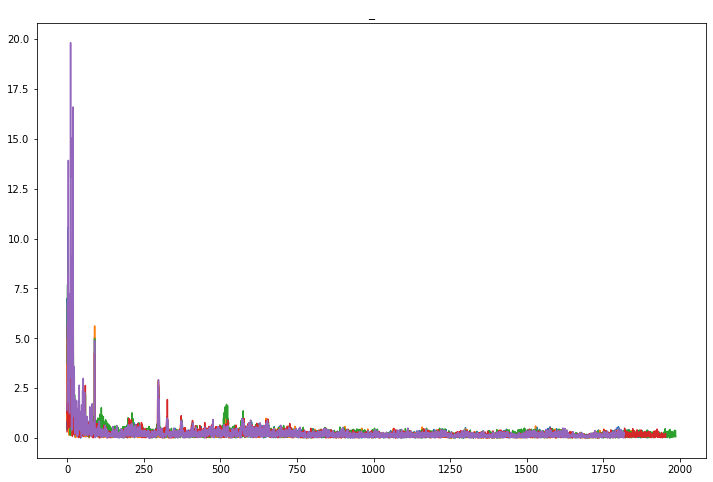

In [57]:
for category, cat_data in data.items():
    plt.figure(figsize=(12, 8))
    plt.title(category)
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav[:,1]))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        plt.plot(x[:x.shape[0] // 2][:5000], y[:x.shape[0] // 2][:5000] / x.shape[0])
    plt.show()